In [11]:
import numpy as np
from scipy.io import wavfile
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt
import IPython

%matplotlib inline

In [27]:
def scale(arr):
    mx, mn = np.max(arr), np.min(arr)
    return np.int16(arr * (32767*2)/(mx-mn) - (mx+mn)/2)

class Signal():
    def __init__(self,rate, data):
        self.rate = rate
        self.data = data
        self.nsamples = len(data)
    
    def plot(self):
        nseconds = self.nsamples/float(self.rate)
        domain = np.arange(self.nsamples)/float(self.rate)
        plt.plot(domain, self.data)
        plt.xlabel("Seconds")
        plt.ylabel("Amplitude")
        plt.show()
        dft = np.real(fftpack.fft(self.data))
        xvals = np.arange(1,len(dft)+1)*1.
        xvals *= self.rate/float(self.nsamples)
        plt.plot(xvals, dft)
    
    
    def export(self, filename):
        wavfile.write(filename, self.rate, scale(self.data))
    

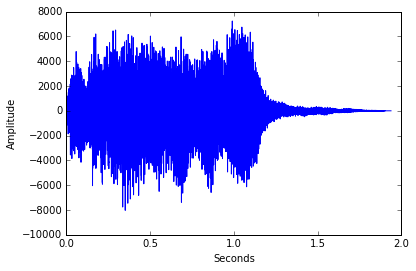

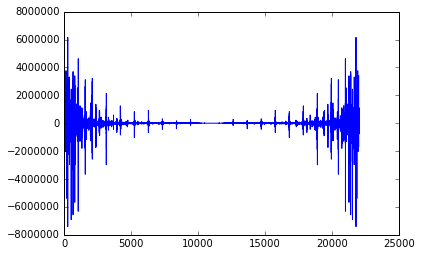

In [28]:
rate, wave = wavfile.read("tada.wav")
tada = Signal(rate, wave)
tada.plot()

In [19]:
def make_wave(frequency, duration):
    srate = 44100
    dom = np.linspace(0,duration,duration*srate)
    return Signal(srate, np.sin(2*np.pi*frequency*dom))

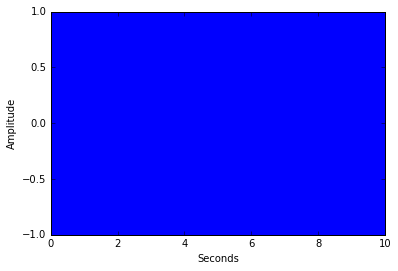

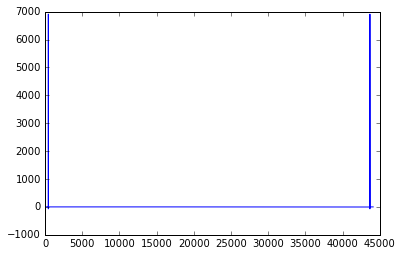

In [29]:
A = make_wave(440, 5)
A.export('A.wav')
IPython.display.Audio('A.wav')
A.plot()